In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#load the dataset

In [26]:
data = pd.read_excel(r"C:\Users\Chinnu\Downloads\iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.shape

(150, 5)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are 150 entries with columns sepal length(SL),sepal width(SW),petal length(PL),petal width(PW),classification

In [29]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
#find missing values

In [32]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values so can be filled by mean

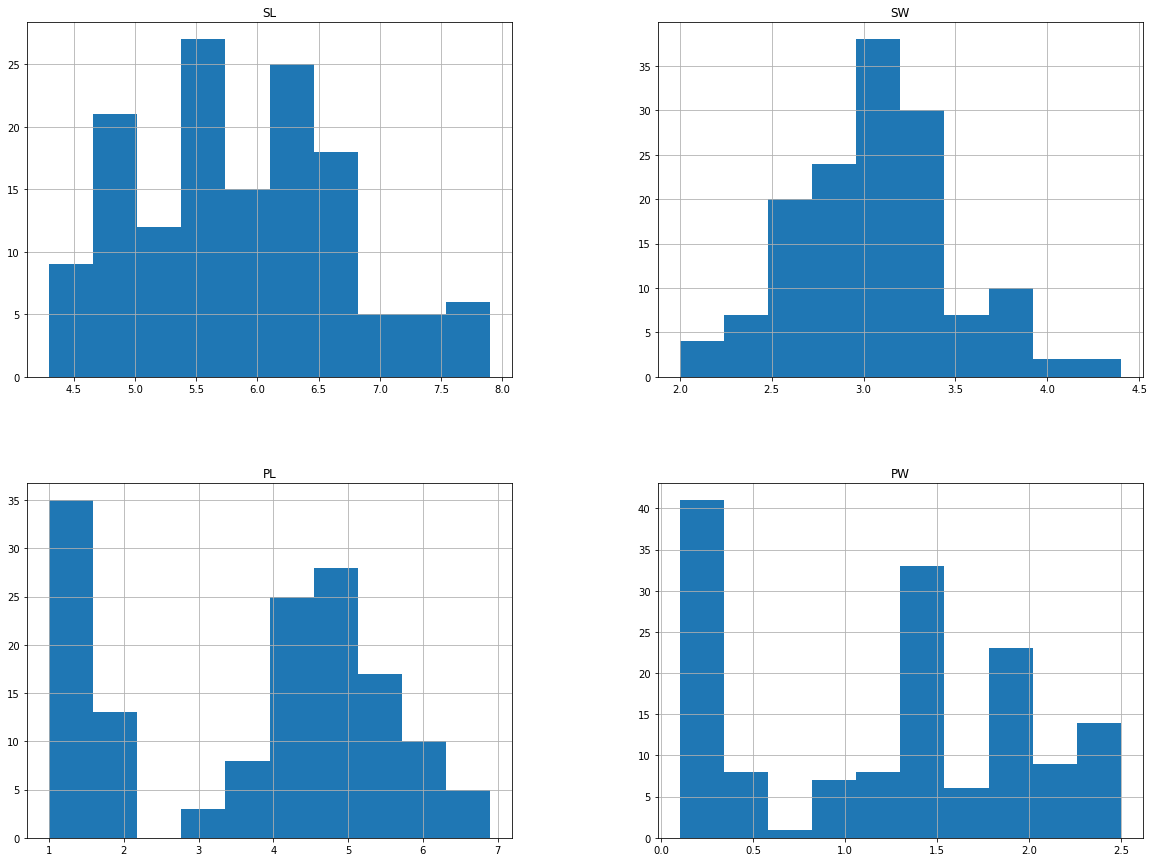

In [33]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [34]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [35]:
data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [36]:
#label encoding

In [37]:
x= data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [53]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    y[a[i]]=label_en.fit_transform(y[a[i]])
y.head()    
    

,Classification
0,0
1,0
2,0
3,0
4,0


In [54]:
#one hot encoding

In [80]:

data= pd.get_dummies(data)

data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [81]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [82]:
#splitting the data

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,train_size=0.2)

In [84]:
x_train.shape

(30, 4)

In [85]:
#building the model

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [87]:
from sklearn.metrics import f1_score,confusion_matrix
print('f1_score:',f1_score(y_test,y_pred,average='weighted'))


f1_score: 0.9253186682598448


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.89      0.87      0.88        39
           2       0.88      0.92      0.90        38

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



From classification report it is seen that setosa has precision of 1 ,f1_score of .99, vericolor has precision of .89 ,f1_score of .88, where as verginica has precision of.88,f1_score of .90 as per RandomForest classifier.

In [89]:
confusion_matrix(y_test,y_pred)

array([[42,  1,  0],
       [ 0, 34,  5],
       [ 0,  3, 35]], dtype=int64)

In [90]:
# logistic regression

In [94]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.90      0.92      0.91        39
           2       0.92      0.95      0.94        38

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



According to logistic Regression,from classification report it is seen that setosa has precision of 1 ,f1_score of .98,vericolorhas precision of .90,f1_score of .91, where as verginica has precision of.92,f1_score of .94.

In [130]:
confusion_matrix(y_test,y_pred)

array([[41,  2,  0],
       [ 0, 26, 13],
       [ 0,  1, 37]], dtype=int64)

In [131]:
#KNN model

In [132]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [133]:
acc_values

[0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333,
 0.9083333333333333]

Text(0, 0.5, 'accuracy')

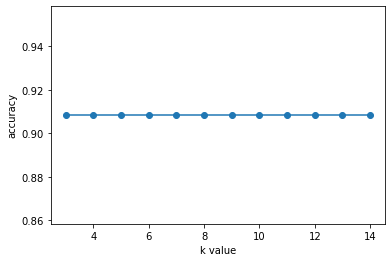

In [134]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [135]:
#standard scaling

In [136]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.91      0.79      0.85        39
           2       0.82      0.97      0.89        38

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.91      0.91       120



According to kNN classifier,from classification report it is seen that setosa has precision of 1 ,f1_score of .95,vericolorhas precision of .91,f1_score of .85, where as verginica has precision of.82,f1_score of .89.

In [138]:
confusion_matrix(y_test,y_pred)

array([[41,  2,  0],
       [ 0, 31,  8],
       [ 0,  1, 37]], dtype=int64)

In [113]:
#decision tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [141]:
y_pred = dt_model.predict(x_test)
print('Accuracy on decision tree model is',accuracy_score(y_test,y_pred))

Accuracy on decision tree model is 0.8583333333333333


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.89      0.64      0.75        39
           2       0.73      0.97      0.83        38

    accuracy                           0.86       120
   macro avg       0.87      0.86      0.85       120
weighted avg       0.88      0.86      0.86       120



According to decision tree classifier,from classification report it is seen that setosa has precision of 1 ,f1_score of .98,vericolor has precision of ..89,f1_score of .75, where as verginica has precision of.73,f1_score of .83.

In [117]:
confusion_matrix(y_test,y_pred)

array([[41,  2,  0],
       [ 0, 34,  5],
       [ 0,  3, 35]], dtype=int64)

In [118]:
#support vector machine

In [143]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [144]:
y_pred = svm_linear.predict(x_test)
print('Accuracy using linear svm is',accuracy_score(y_test,y_pred))

Accuracy using linear svm is 0.8666666666666667


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.90      0.67      0.76        39
           2       0.75      1.00      0.85        38

    accuracy                           0.87       120
   macro avg       0.88      0.87      0.86       120
weighted avg       0.89      0.87      0.86       120



According to decision tree classifier,from classification report it is seen that setosa has precision of 1 ,f1_score of .96,vericolor has precision of .90,f1_score of .76, where as verginica has precision of.75,f1_score of .85.

From the above analysis LogisticRegression model has highest f1_score, so it is recommende to use this model